In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [18]:
df = pd.read_csv('vehicle.csv')
print('Before dropping number of rows:',df.shape[0])
print('No of null values Before dropping rows',df.isnull().sum().sum())
df.dropna(axis=0,how='any',inplace=True)
print('After dropping number of rows:',df.shape[0])
print('No of null values after dropping rows',df.isnull().sum().sum())

Before dropping number of rows: 846
No of null values Before dropping rows 41
After dropping number of rows: 813
No of null values after dropping rows 0


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

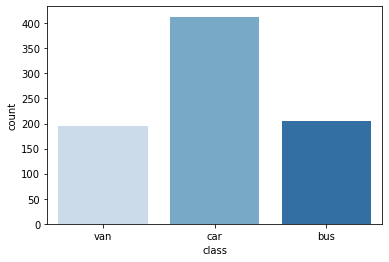

In [23]:
sns.countplot(df['class'],palette='Blues')

### 3. Check for any missing values in the data 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

### 4. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [55]:
from scipy.stats import zscore
data = df.drop('class',axis=1).copy()
data = data.apply(zscore)
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### 5. Assign a dummy array called distortion

You can later use this array to plot the elbow plot

In [56]:
distortion = []

### 6. Calculating distortion - C distance

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

**Here, logically K-Means attempts to minimize distortion defined by the the sum of the squared distances between each observation and its closest centroid.**

In [57]:
k = [i for i in range(1,10)]
from sklearn.cluster import KMeans
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(data)
    distortion.append(model.inertia_)

### 7. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

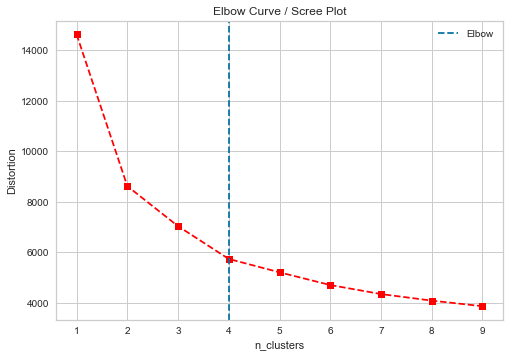

In [72]:
plt.plot(k,distortion,'--',color = 'red',marker='s')
plt.xlabel('n_clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve / Scree Plot')
plt.axvline(x=4.0, linestyle='--', c='b',label='Elbow')
plt.legend()
plt.show()

### 8. Find out the optimal value of K

In [59]:
# the graph or the elbow shows the best k value at 4

### 9. Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [60]:
model = KMeans(n_clusters=4)
model.fit(data)
center = model.cluster_centers_

### 10. Store the centroids in a dataframe with column names from the original dataset given 

Hint: Use pd.Dataframe function 

In [61]:
center_df = pd.DataFrame(center)
center_df.columns = [data.columns]
center_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.920172,-0.507081,-0.864378,-1.058016,-0.534725,-0.313504,-0.765483,0.839837,-0.735110,-0.481858,-0.781891,-0.770747,-0.377175,0.751184,-0.101980,-0.310325,-1.021600,-1.074348
1,0.136047,0.096297,0.259205,0.668973,0.730061,0.420763,0.132601,-0.330962,0.077054,0.056030,0.295419,0.080484,0.083615,-0.150365,0.031472,-0.010701,0.477306,0.408508
2,1.260341,1.318532,1.302507,0.969997,0.036383,0.262084,1.421063,-1.286802,1.439117,1.246338,1.297687,1.441211,1.225102,-0.041731,0.215567,0.317837,-0.114036,0.142410
3,-0.331467,-0.879752,-0.541613,-0.251886,0.066913,-0.217831,-0.697124,0.610181,-0.712067,-0.801549,-0.667056,-0.672528,-0.930148,-0.776126,-0.132107,0.048606,1.032407,0.871263


### 11. Use kmeans.labels_ function to print out the labels of the classes

In [63]:
print(model.labels_)

[1 3 2 3 1 3 3 3 3 3 1 0 1 2 0 1 2 0 0 3 3 2 3 0 2 1 0 1 3 3 2 3 0 1 2 0 2
 0 0 3 2 0 0 0 0 3 0 3 2 3 2 3 1 0 2 0 1 0 0 0 1 0 2 3 1 2 1 0 3 2 1 0 0 2
 3 0 3 2 3 0 1 0 2 3 2 1 0 2 0 0 2 0 1 3 3 0 1 1 0 0 1 3 1 0 0 0 1 2 2 1 0
 0 3 3 0 0 0 0 1 2 2 3 1 0 2 1 0 3 0 3 3 2 0 1 2 1 3 3 3 1 1 3 2 3 2 3 0 3
 0 2 3 3 2 2 3 2 0 0 2 2 3 2 1 3 1 3 0 2 0 3 0 2 1 3 1 2 3 1 3 2 3 0 2 0 0
 0 1 3 2 2 3 0 1 0 2 3 3 3 2 0 0 2 0 3 2 0 0 0 3 2 3 2 0 0 0 0 2 3 0 3 2 0
 3 3 0 2 0 0 3 3 2 0 2 0 3 1 2 3 3 2 2 0 1 3 3 1 0 1 3 0 0 1 3 2 3 0 0 2 3
 1 0 0 2 0 3 2 0 3 1 0 3 2 3 2 0 1 3 2 3 3 3 0 0 2 2 2 1 0 0 2 0 0 0 1 0 2
 2 0 1 3 0 1 0 3 3 2 2 0 2 2 0 2 3 3 3 0 0 2 2 2 3 3 3 1 0 1 0 1 1 3 2 1 1
 2 2 1 0 0 2 0 0 0 1 1 1 1 0 2 2 0 0 2 0 2 0 2 3 1 1 0 1 2 0 3 3 1 1 3 3 3
 3 2 3 2 3 2 3 0 0 0 3 1 0 0 3 0 2 3 3 0 0 2 3 0 1 3 2 3 2 3 2 1 0 0 2 3 0
 0 1 1 2 0 3 1 2 0 2 2 2 3 1 3 3 3 2 0 0 3 2 1 3 2 1 0 1 0 0 2 3 0 2 2 2 0
 2 2 0 1 0 2 2 1 3 0 0 2 1 0 2 2 3 0 2 2 1 0 0 2 2 2 0 0 1 2 2 3 1 2 0 3 2
 3 0 0 3 2 0 3 1 0 1 2 1 

### 12. Use kmeans.labels_ function to print out the labels of the classes

In [74]:
# print(model.labels_)